<a href="https://colab.research.google.com/github/Tsxkii/AstroDataAnalysis/blob/main/CalcHubbleConstType1ASupernova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Tonry_2003.vot to Tonry_2003.vot


In [6]:
data = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0.5, 1.0, 'Hubble Diagram')

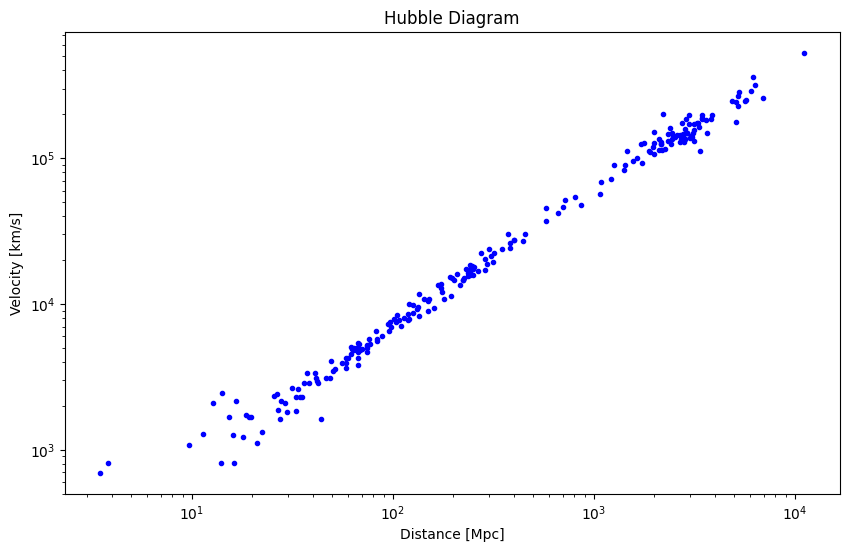

In [7]:
d = 10**data["col8"] / 72.0 * u.mpc
d_error = (10**(data["col8"]+data["col9"]) - 10**data["col8"]) / 72.0 * u.mpc
velocity = 10**data["col7"] * u.km / u.s
plt.figure(figsize=(10,6))
plt.plot(d.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="blue", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.title("Hubble Diagram")

Text(0.5, 1.0, 'Hubble Diagram')

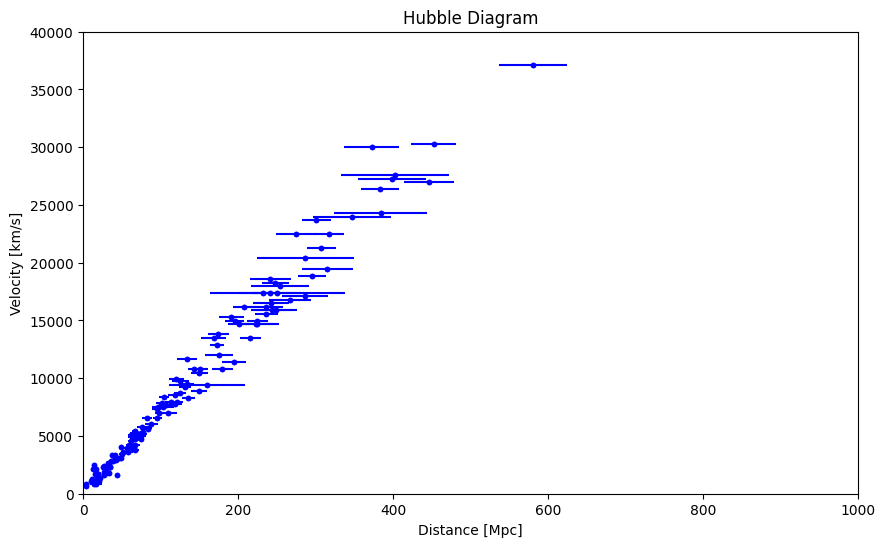

In [8]:
#Linear Scale
d = 10**data["col8"] / 72.0 * u.mpc
d_error = (10**(data["col8"]+data["col9"]) - 10**data["col8"]) / 72.0 * u.mpc
velocity = 10**data["col7"] * u.km / u.s
plt.figure(figsize=(10, 6))
plt.plot(d.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="blue", linestyle="none")
plt.errorbar(d.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=d_error.to(u.mpc).value, marker=".", color="blue", linestyle="none")
plt.xlim(0, 1000)  # Set x limits for better visibility/readability
plt.ylim(0, 4e4)  # Set y limits for better visibility/readability
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.title("Hubble Diagram")

In [9]:
x = d.to(u.mpc).value #distance
y = velocity.to(u.km / u.s).value #velocity
ind = np.where((x > 0) & (x < 1000)) #indicies of data points(Ignores unwanted points)
z = np.polyfit(x[ind], y[ind], 1) #Linear fit, z is an array containing the slope of the linear fit which is the hubble constant
p = np.poly1d(z)
velocity_model = p(x)



Text(50, 30000, 'H_0 = 65.61 km/s/Mpc')

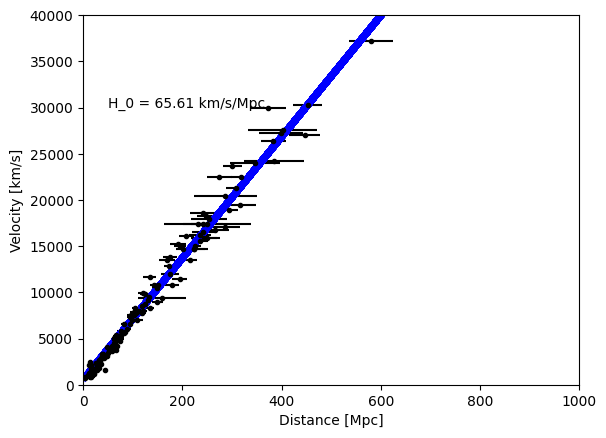

In [10]:
#Final plot with the Hubble Constant stated from the data
plt.errorbar(d.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=d_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(d.to(u.mpc).value, velocity_model, color="blue", linewidth=5)
plt.xlim(0, 1000)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"H_0 = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000))

In [11]:
# States the measured Hubble constant
H0 = z[0]  # Hubble constant in km/s/Mpc
print(f"Measured Hubble constant: {H0:.2f} km/s/Mpc")

Measured Hubble constant: 65.61 km/s/Mpc


In [12]:
# Calculate the age of the Universe based on the Hubble constant
# Age of the Universe = 1/H0
H0_s = H0 * (u.km / u.s / u.Mpc)  # Hubble constant in km/s/Mpc  # Hubble constant in 1/s
# Convert H0_s to 1/s
H0_s = H0_s.to(1/u.s) # Convert to 1/s
age_universe = 1 / H0_s  # Age in seconds
age_universe = age_universe.to(u.yr)  # age of universe converted to years


print(f"Age of the Universe: {age_universe:.2f} old")

Age of the Universe: 14903067778.75 yr old


In [13]:
# Calculating the reduce Chi-squared statistics.

In [16]:
def reduced_chi_squared(observed, model, error):
    """Calculate the reduced chi-squared statistic."""
    chi_squared = np.sum(((observed - model) / error) ** 2) # Squaring each normalized residual and summing them gives the total chi-squared value,
                                                            # which represents the total discrepancy between the observed data and the linear model, scaled by the uncertainties.
    dof = len(observed) - 1  # Degrees of freedom
    return chi_squared / dof #This returns the reduced chi-squared statistic that ensures that the chi-squared value is correctly adjusted with respect to the number of data points.


# Error in velocity for the reduced chi-squared calculation
errors = data["col9"]   # velocity errors
chi_squared_red = reduced_chi_squared(velocity.to(u.km / u.s).value[ind], velocity_model[ind], errors[ind])
print(f"Reduced Chi-squared: {chi_squared_red:.2f}")

Reduced Chi-squared: 1087952226.41
